# Decision Tree

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

# Company Data

In [17]:
company=pd.read_csv('Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [18]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [19]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [20]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [21]:
lb=LabelEncoder()
company['ShelveLoc']=lb.fit_transform(company['ShelveLoc'])
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,0,50,12,Yes,Yes


In [22]:
array=company
X=array.iloc[:,0:6]
Y=array.iloc[:,6]

In [23]:
X

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [24]:
Y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [26]:
ml=DecisionTreeClassifier(criterion='entropy',max_depth=3)
ml.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'X[0] <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [83, 67, 170]'),
 Text(0.25, 0.625, 'X[0] <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [55, 0, 53]'),
 Text(0.125, 0.375, 'X[4] <= 349.5\nentropy = 0.503\nsamples = 18\nvalue = [16, 0, 2]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [3, 0, 2]'),
 Text(0.375, 0.375, 'X[5] <= 151.5\nentropy = 0.987\nsamples = 90\nvalue = [39, 0, 51]'),
 Text(0.3125, 0.125, 'entropy = 0.996\nsamples = 84\nvalue = [39, 0, 45]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(0.75, 0.625, 'X[0] <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [28, 67, 117]'),
 Text(0.625, 0.375, 'X[5] <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [25, 31, 104]'),
 Text(0.5625, 0.125, 'entropy = 1.155\nsamples = 33\nvalue = [14, 1, 18]'),
 Text(0.6875, 0.125, 'entropy = 1.178\nsamples = 127\nvalue = [11, 30, 86]'),
 Text(0.875

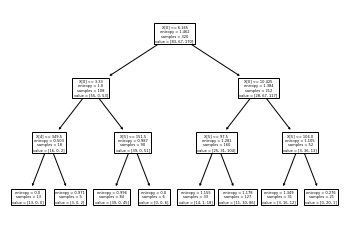

In [27]:
tree.plot_tree(ml)

[Text(0.5, 0.875, 'Sales <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [83, 67, 170]\nclass = Medium'),
 Text(0.25, 0.625, 'Sales <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [55, 0, 53]\nclass = Bad'),
 Text(0.125, 0.375, 'Ppl <= 349.5\nentropy = 0.503\nsamples = 18\nvalue = [16, 0, 2]\nclass = Bad'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0, 0]\nclass = Bad'),
 Text(0.1875, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [3, 0, 2]\nclass = Bad'),
 Text(0.375, 0.375, 'Prc <= 151.5\nentropy = 0.987\nsamples = 90\nvalue = [39, 0, 51]\nclass = Medium'),
 Text(0.3125, 0.125, 'entropy = 0.996\nsamples = 84\nvalue = [39, 0, 45]\nclass = Medium'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]\nclass = Medium'),
 Text(0.75, 0.625, 'Sales <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [28, 67, 117]\nclass = Medium'),
 Text(0.625, 0.375, 'Prc <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [25, 31, 104]\nclass = Medium'),
 Text(0.5625, 0.1

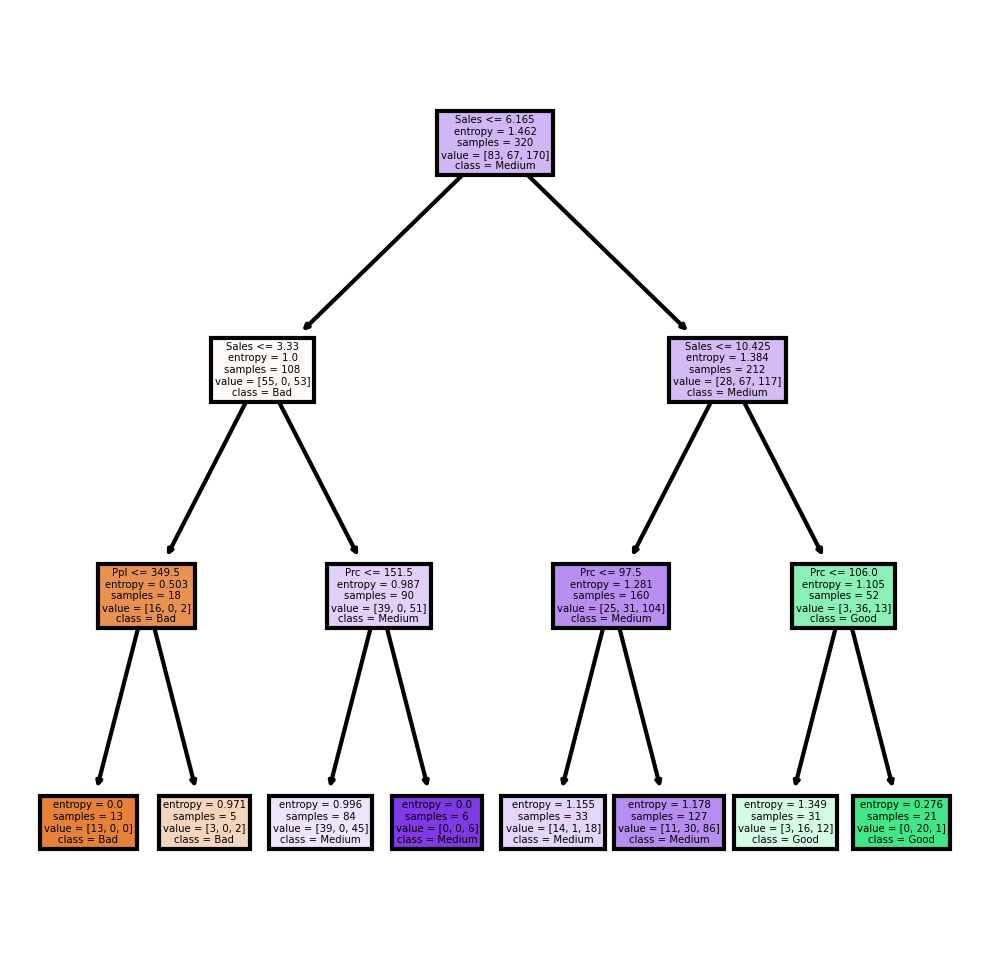

In [28]:
fn=['Sales','Comp','Income','Adv','Ppl','Prc']
cn=['Bad','Good','Medium']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(ml,feature_names=fn,class_names=cn,filled=True)

In [29]:
pred=ml.predict(x_test)
pd.Series(pred).value_counts()

2    63
1    13
0     4
dtype: int64

In [30]:
pred

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [31]:
pd.crosstab(y_test,pred)

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [32]:
np.mean(pred==y_test)

0.625

# Gini Impurity

In [33]:
mld=DecisionTreeClassifier(criterion='gini',max_depth=3)
mld.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
prd=mld.predict(x_test)
pd.Series(prd).value_counts()

2    42
0    33
1     5
dtype: int64

In [35]:
pd.crosstab(y_test,prd)

col_0,0,1,2
ShelveLoc,,,
0,8,0,5
1,2,4,12
2,23,1,25


In [36]:
np.mean(y_test==prd)

0.4625

# Fraud Check

In [37]:
FC=pd.read_csv('Fraud_check.csv')
FC.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [38]:
FC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [39]:
FC.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [40]:
FC.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [41]:
FC['Taxable.Income'].min()

10003

In [42]:
FC['Taxable.Income'].max()

99619

In [43]:
pd.get_dummies(FC[['Undergrad','Marital.Status','Urban']])

,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1,0,0,0,1,0,1
1,0,1,1,0,0,0,1
2,1,0,0,1,0,0,1
3,0,1,0,0,1,0,1
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
595,0,1,1,0,0,0,1
596,0,1,1,0,0,0,1
597,1,0,1,0,0,0,1
598,0,1,0,1,0,1,0


In [44]:
df=pd.get_dummies(FC,drop_first=True)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [45]:
df['Tax']=pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [46]:
dff=pd.get_dummies(df,drop_first=True)
dff

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [47]:
df1=dff.drop('Taxable.Income',axis=1)
df1

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


In [48]:
X=df1.iloc[:,0:6]
Y=df1.iloc[:,-1]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

In [50]:
mlx=DecisionTreeClassifier(criterion='entropy',max_depth=3)
mlx.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5416666666666666, 0.875, 'X[0] <= 63521.0\nentropy = 0.722\nsamples = 480\nvalue = [96, 384]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 49230.5\nentropy = 0.556\nsamples = 116\nvalue = [15, 101]'),
 Text(0.16666666666666666, 0.375, 'X[0] <= 48850.0\nentropy = 0.672\nsamples = 68\nvalue = [12, 56]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.644\nsamples = 67\nvalue = [11, 56]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.375, 'X[5] <= 0.5\nentropy = 0.337\nsamples = 48\nvalue = [3, 45]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.529\nsamples = 25\nvalue = [3, 22]'),
 Text(0.75, 0.625, 'X[0] <= 64532.5\nentropy = 0.765\nsamples = 364\nvalue = [81, 283]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.375, 'X[1] <= 0.5\nentropy = 0.753\nsamples = 361\nvalue = [78, 283]'),
 Text(0.75, 0.125, 

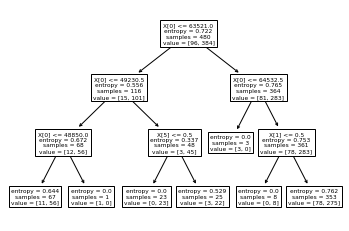

In [51]:
tree.plot_tree(mlx)

In [52]:
t=mlx.predict(x_test)
pd.Series(t).value_counts()

1    118
0      2
dtype: int64

In [53]:
t

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [54]:
pd.crosstab(y_test,t)

col_0,0,1
Tax_Good,,
0,1,27
1,1,91


In [55]:
np.mean(t==y_test)

0.7666666666666667

In [56]:
mlxd=DecisionTreeClassifier(criterion='gini',max_depth=3)
mlxd.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [57]:
s=mlxd.predict(x_test)
pd.Series(s).value_counts()

1    116
0      4
dtype: int64

In [58]:
s

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [59]:
pd.crosstab(y_test,s)

col_0,0,1
Tax_Good,,
0,1,27
1,3,89


In [60]:
np.mean(y_test==s)

0.75